In [1]:
import os
import collections


import powerlaw
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import warnings
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from datetime import date
sns.set()
warnings.filterwarnings("ignore")

# Powerlaw test for network

In [5]:
selectedNetwork = pd.read_csv("dataset/networkiconomi.txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')

In [6]:
selectedNetwork

,from,to,date,value
0,4377026,1747827,2017-11-20 22:17:18,1516401039255000000000
1,193337,2008557,2017-09-09 10:54:52,4128627960000000000000
2,4388689,1747716,2017-06-29 12:21:16,2392127188967118000000
3,4375736,1747716,2017-05-30 09:01:09,1596956542880647200000
4,4383181,1747716,2017-04-09 21:09:14,1999900000000000100000
...,...,...,...,...
114909,2084371,4379248,2017-08-24 21:39:26,13316606820000000000
114910,418904,373666,2017-12-18 06:33:37,15623000000000000000
114911,193337,298110,2017-06-20 09:24:44,792000000000000000000
114912,193337,4169343,2017-05-26 12:15:53,1679800000000000000000


**Create the graph from transaction network**

In [11]:
transactionGraphs = nx.DiGraph()
# Populate graph with edges
for item in selectedNetwork.to_dict(orient="records"):
    transactionGraphs.add_edge(item["from"], item["to"], value=item["value"])
fit = powerlaw.Fit(list(dict(transactionGraphs.degree()).values()),estimate_discrete=False)

Calculating best minimal value for power law fit


**Plotting CDF,PDF,CCDF**

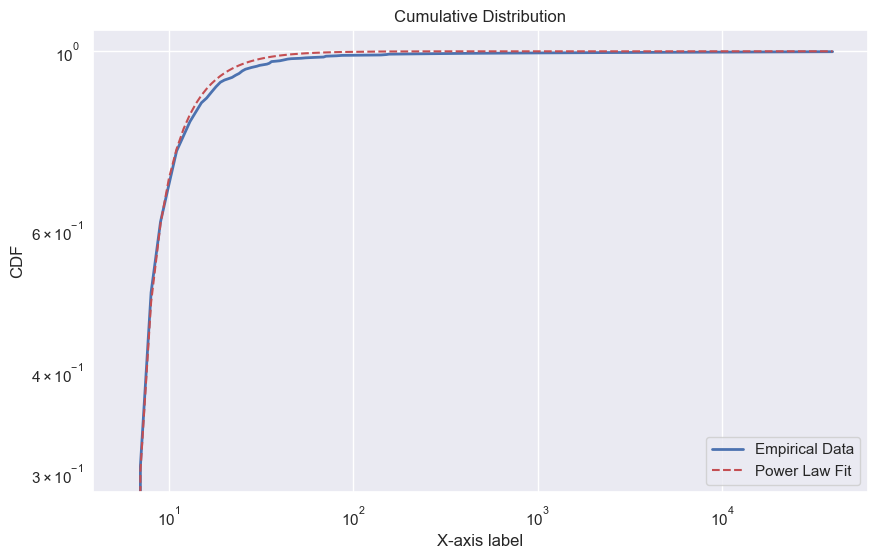

In [39]:
plt.figure(figsize=(10, 6))
fit.plot_cdf(color='b', linewidth=2,label='Empirical Data')
fit.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('X-axis label')
plt.ylabel('CDF')
plt.title('Cumulative Distribution')
plt.legend()
plt.show()

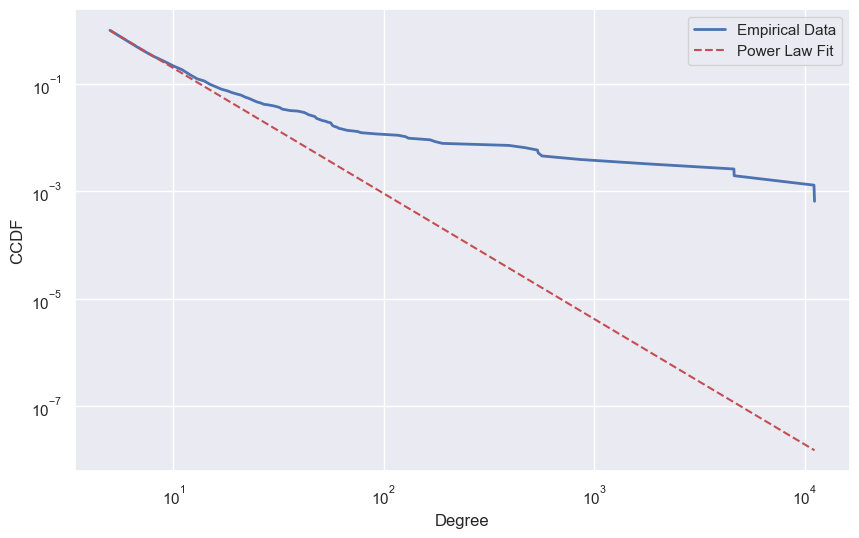

In [12]:
# Probability plot
plt.figure(figsize=(10, 6))
fit.plot_ccdf(color='b', linewidth=2, label='Empirical Data')
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()


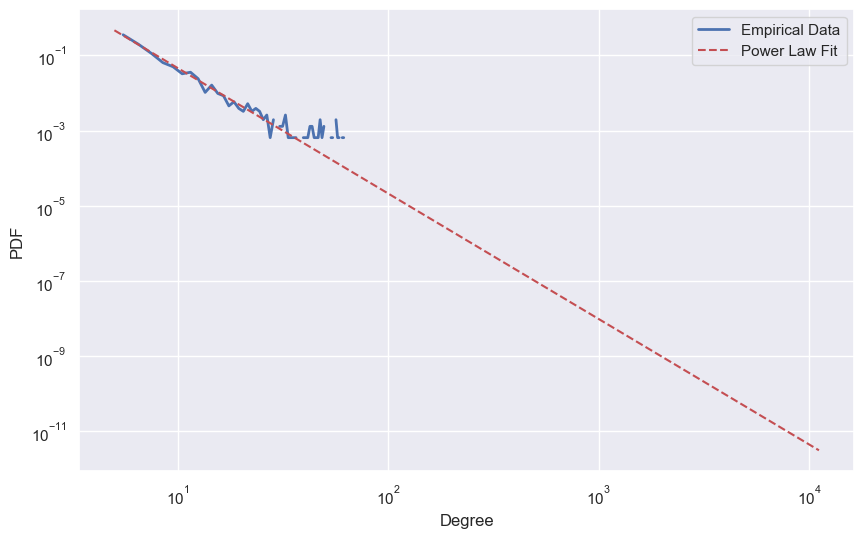

In [13]:
# PDF plot
plt.figure(figsize=(10, 6))
fit.plot_pdf(color='b', linewidth=2, label='Empirical Data',linear_bins=True)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

**Power statistics**

In [16]:
fit.power_law.alpha

3.3369908016613934

In [15]:
fit.power_law.xmin

5.0

In [17]:
fit.distribution_compare('power_law', 'exponential')

(3292.124851894239, 6.6648326226546605e-09)

# Powerlaw test on graph generating by BA model

In [42]:
BA_graph = nx.barabasi_albert_graph(20000,10)
BA_degrees = pd.DataFrame(BA_graph.degree(),columns=['Node','Degree'])
BA_degrees

,Node,Degree
0,0,585
1,1,374
2,2,102
3,3,508
4,4,481
...,...,...
19995,19995,10
19996,19996,10
19997,19997,10
19998,19998,10


In [49]:
fit_BA = powerlaw.Fit(BA_degrees['Degree'])

Calculating best minimal value for power law fit


**Plotting CDF,PDF,CCDF**

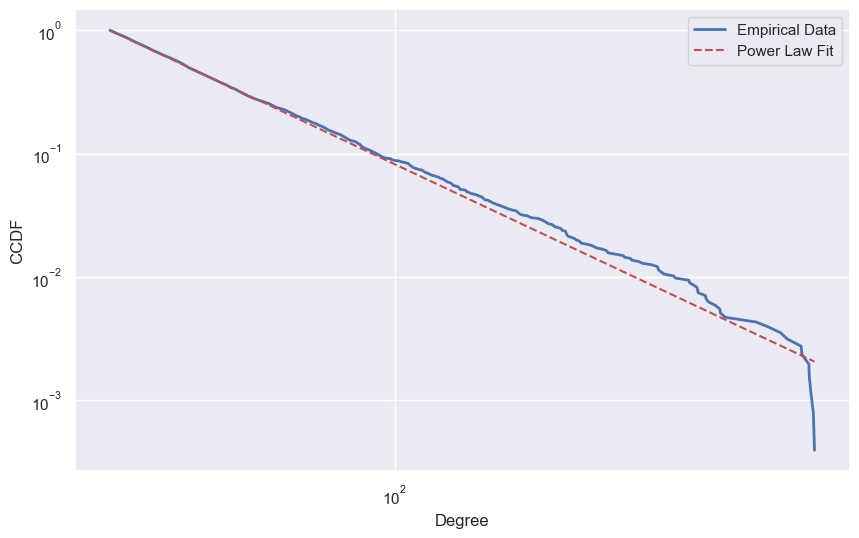

In [50]:
# Probability plot
plt.figure(figsize=(10, 6))
fit_BA.plot_ccdf(color='b', linewidth=2, label='Empirical Data')
fit_BA.power_law.plot_ccdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()


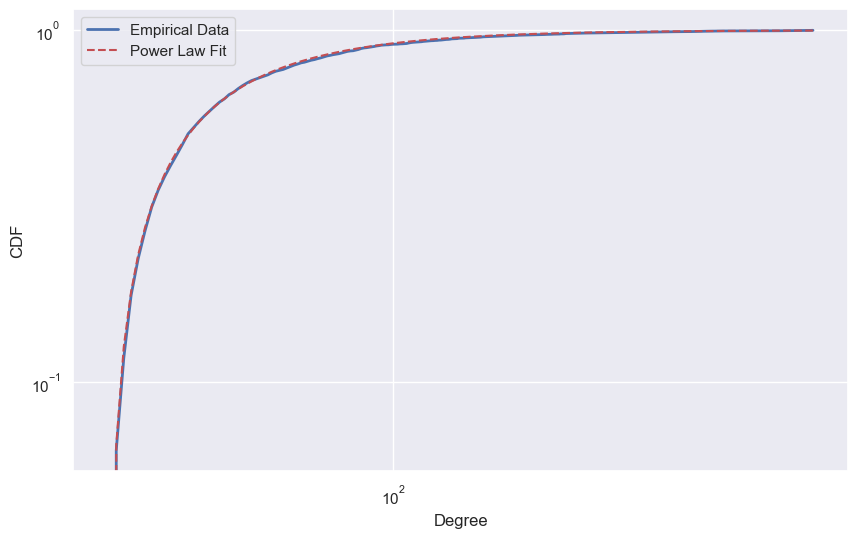

In [51]:
# Probability plot
plt.figure(figsize=(10, 6))
fit_BA.plot_cdf(color='b', linewidth=2, label='Empirical Data')
fit_BA.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.legend()
plt.show()

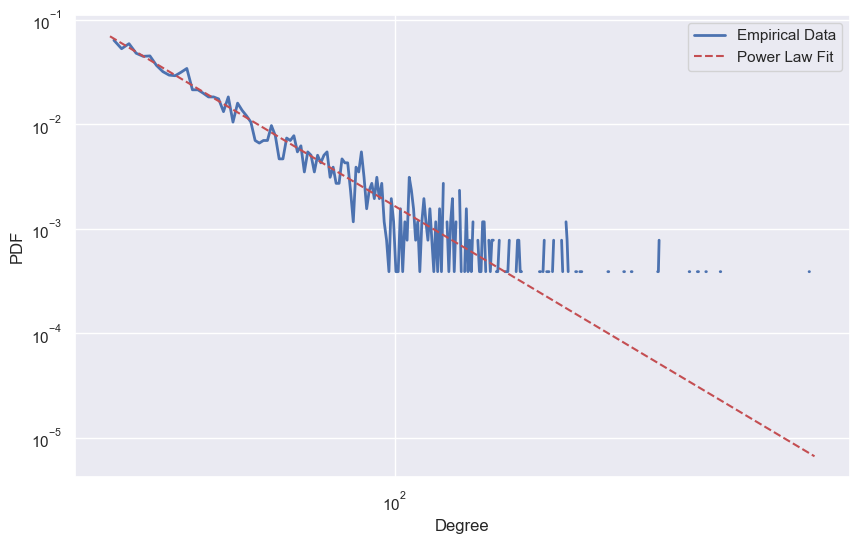

In [52]:
plt.figure(figsize=(10, 6))
fit_BA.plot_pdf(color='b', linewidth=2, label='Empirical Data',linear_bins=True)
fit_BA.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

**Powerlaw statistics**

In [53]:
fit_BA.power_law.alpha

3.0220265245748896

In [54]:
fit_BA.power_law.xmin

29.0

In [55]:
fit_BA.distribution_compare('power_law', 'exponential')[0]

474.0568687336261

# Daily transaction network
Each data points in the phase base represent transaction networks for each day

In [146]:
selectedNetwork = pd.read_csv("dataset/networkcentra.txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')
selectedNetwork = selectedNetwork.sort_values(by = 'date')
selectedNetwork['date'] = selectedNetwork['date'].dt.date
selectedNetwork

,from,to,date,value
30943,1937660,1765138,2017-08-01,250000000000000000000
79171,1937660,1765138,2017-08-01,250000000000000000000
13306,1944968,1924395,2017-08-05,72000000000000000000
1257,1944968,1930353,2017-08-05,30000000000000000000
14570,1931184,1944968,2017-08-05,100000000000000000000
...,...,...,...,...
69846,82,1918043,2018-05-06,965000000000000000000
71530,82,1918044,2018-05-06,56880000000000000000000
26246,1918044,26,2018-05-06,56880000000000000000000
45769,26,1681146,2018-05-06,227055000000000000000000


**Construct graph for each day and apply powerlaw test on each transaction graph and store it in CSV file**

In [147]:
currDate = selectedNetwork['date'].min()
transactionGraphs = nx.DiGraph()
score_list = []
column = ["score","#nodes","xmin","alpha","date"]
row_list = []
for index, row in selectedNetwork.iterrows():
    if(row['date'] != currDate ):
        row_df = []
        
        degrees = list(dict(transactionGraphs.degree()).values())
        fit = powerlaw.Fit(degrees)
        row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
        row_df.append(transactionGraphs.number_of_nodes())
        row_df.append(fit.power_law.xmin)
        row_df.append(fit.power_law.alpha)
        row_df.append(currDate)
        
        currDate = row['date']
        
        row_list.append(row_df)
        transactionGraphs = nx.DiGraph()
    else:
        transactionGraphs.add_edge(row["from"], row["to"], value=row["value"])
df_power_law = pd.DataFrame(row_list,columns= column)    
df_power_law

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

,score,#nodes,xmin,alpha,date
0,0.000000,2,NaN,NaN,2017-08-01
1,215.194024,97,1.0,13.248470,2017-08-05
2,2.560811,55,2.0,6.318875,2017-08-06
3,48.004011,36,1.0,9.531801,2017-08-07
4,2.605469,9,1.0,13.984255,2017-08-08
...,...,...,...,...,...
270,95.784726,77,1.0,6.016439,2018-05-01
271,140.481123,106,1.0,6.152657,2018-05-02
272,2162.777585,693,1.0,25.045473,2018-05-03
273,167.826249,115,1.0,6.629240,2018-05-04


In [149]:
df_power_law.to_csv("result_dataset\power_law_result_centra.csv")

# Split data at stable period Marh 2018 of Aragon network

In [18]:
df_power_law = pd.read_csv("result_dataset\power_law_aragon_df.csv")
df_power_law['date'] = pd.to_datetime(df_power_law['date'])
df_power_law['date'] = df_power_law['date'].dt.date
threshold = pd.to_datetime('2018-03-01')
print(threshold)
trainNetwork = df_power_law[df_power_law['date'] <= threshold]
testNetwork = df_power_law[df_power_law['date'] > threshold]

2018-03-01 00:00:00


In [19]:
testNetwork

,Unnamed: 0,score,#nodes,xmin,alpha,date
289,289,52.510836,170,2.0,4.574004,2018-03-02
290,290,109.671078,238,2.0,6.377133,2018-03-03
291,291,48.766101,139,2.0,6.340835,2018-03-04
292,292,205.491762,351,2.0,8.782498,2018-03-05
293,293,126.787400,205,2.0,7.950499,2018-03-06
...,...,...,...,...,...,...
349,349,26.473745,109,2.0,6.039715,2018-05-01
350,350,36.190116,112,2.0,6.268952,2018-05-02
351,351,84.086900,170,2.0,8.485789,2018-05-03
352,352,59.322974,149,2.0,9.059328,2018-05-04


**Draw diagram to illustrate the score resulted from the comparision between powerlaw and exponential distribution for each day**

In [22]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_power_law['date'], y=df_power_law['score'], mode='lines', name='Line'))
# fig.add_trace(go.Scatter(x=df_power_law['#nodes'], y=df_power_law['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='Date'),
    yaxis=dict(title='score'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

**Draw diagram to illustrate the trajectory with data points in steady period in green**

In [21]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=trainNetwork['#nodes'], y=trainNetwork['alpha'], mode='lines', name='Line',line=dict(width=1,color='blue')))
fig.add_trace(go.Scatter(x=trainNetwork['#nodes'], y=trainNetwork['alpha'], mode='markers', name='Scatter',line=dict(color='red')))
fig.add_trace(go.Scatter(x=testNetwork['#nodes'], y=testNetwork['alpha'], mode='lines', name='Line',line=dict(width=1,color='grey')))
fig.add_trace(go.Scatter(x=testNetwork['#nodes'], y=testNetwork['alpha'], mode='markers', name='Scatter',line=dict(color='green')))

# Customize the layout
fig.update_layout(
    title=dict(
        text='Aragon\'s Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

# Sliding window
Each data points in the phase base represent transaction networks for windows of 7 days

In [32]:
selectedNetwork = pd.read_csv("dataset/networkaragon.txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')
selectedNetwork = selectedNetwork.sort_values(by = 'date')
selectedNetwork['date'] = selectedNetwork['date'].dt.date
selectedNetwork

,from,to,date,value
49133,250733,248773,2017-05-17,135918900000000000000
110195,254519,248578,2017-05-17,4800000000000000000000
105736,51586,255124,2017-05-17,150000000000000000000
12305,38556,255135,2017-05-17,100000000000000000000
88428,254797,255142,2017-05-17,1470000000000000000000
...,...,...,...,...
114933,17,91951,2018-05-06,682400128610000000000
118737,194337,195499,2018-05-06,2304805430306600000
81326,195500,195501,2018-05-06,31413345939999997952
80973,195498,194319,2018-05-06,50000000000000000000


**Apply sliding window algorithm and apply powerlaw test on each window and store to dataframe**

In [33]:
def sliding_window_dates(start_date, end_date):
    # Initialize the sliding window
    
    window_end = start_date   # Initial window size is 3 days
    window_start = window_end - timedelta(days=6)
    
    # Slide the window through the date interval
    while window_end <= end_date:
        if(window_start >= start_date):
            yield (window_start, window_end)
        else:
            yield(start_date,window_end)
        
        # Slide the window by one day
        window_start += timedelta(days=1)
        window_end += timedelta(days=1)


start_date = selectedNetwork['date'].min()
end_date = selectedNetwork['date'].max()

score_list = []
column = ["score","#nodes","xmin","alpha","date"]
row_list = []

for window_start, window_end in sliding_window_dates(start_date, end_date):
    selectedNetworkInTimeFrame = selectedNetwork[
        (selectedNetwork['date'] >= window_start) & (selectedNetwork['date'] <= window_end)]
    transactionGraphs = nx.DiGraph()
    
    for index, row in selectedNetworkInTimeFrame.iterrows():
        transactionGraphs.add_edge(row["from"], row["to"], value=row["value"])
    row_df = []
        
    degrees = list(dict(transactionGraphs.degree()).values())
    fit = powerlaw.Fit(degrees)
    row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
    row_df.append(transactionGraphs.number_of_nodes())
    row_df.append(fit.power_law.xmin)
    row_df.append(fit.power_law.alpha)
    row_df.append(window_end)
    row_list.append(row_df)

df_sliding = pd.DataFrame(row_list,columns= column)  

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [34]:
df_sliding.to_csv("result_dataset\power_law_result_aragon_7.csv")

In [24]:
df_sliding = pd.read_csv("result_dataset\power_law_result_cindicator_7.csv",index_col=False)
df_sliding

,Unnamed: 0,score,#nodes,xmin,alpha,date
0,0,0.000000,4,NaN,NaN,2017-09-10
1,1,1.139417,5,1.0,8.213475,2017-09-11
2,2,1.139417,5,1.0,8.213475,2017-09-12
3,3,0.000000,4,NaN,NaN,2017-09-13
4,4,0.000000,12,NaN,NaN,2017-09-14
...,...,...,...,...,...,...
234,234,309.519621,496,2.0,8.176227,2018-05-02
235,235,362.511276,562,2.0,8.351849,2018-05-03
236,236,379.373875,605,2.0,8.198376,2018-05-04
237,237,351.706831,596,2.0,7.944900,2018-05-05


In [25]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_sliding['#nodes'], y=df_sliding['alpha'], mode='lines', name='Line',line=dict(width=1)))
fig.add_trace(go.Scatter(x=df_sliding['#nodes'], y=df_sliding['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Cindicator\'s Trajectory (Sliding windows)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

In [26]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_sliding['date'], y=df_sliding['score'], mode='lines', name='Line'))



# Customize the layout
fig.update_layout(
    title=dict(
        text='Comparision score to exponential distribution',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='date'),
    yaxis=dict(title='score'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=800
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()